# Importing library

In [75]:
import os
import torch
from PIL import Image
import opendatasets as od
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Data Setting

In [76]:
batch_size = 4

## Monet dataset

In [59]:
transform =transforms.Compose([transforms.ToTensor()])

In [62]:
monet_dataset_folderurl=r'gan-getting-started\monet_jpg'

In [63]:
monet_tensor= []
for file in os.listdir(monet_dataset_folderurl):
    image_path = os.path.join(monet_dataset_folderurl, file)
    image = Image.open(image_path)
    image = transform(image)  # Assuming transform is a torchvision transform
    monet_tensor.append(image)

In [77]:
Monet_dl=DataLoader(monet_tensor, batch_size, shuffle=True, num_workers=2, pin_memory=False )

## Photos Dataset

In [78]:
photo_dataset_folderurl=r'gan-getting-started\photo_jpg'

In [79]:
photos_tensor=[]
for file in os.listdir(photo_dataset_folderurl):
    image_path = os.path.join(photo_dataset_folderurl, file)
    image = Image.open(image_path)
    image = transform(image)  # Assuming transform is a torchvision transform
    photos_tensor.append(image)

In [80]:
photos_dl=DataLoader(photos_tensor, batch_size, shuffle=True, num_workers=2, pin_memory=False )

In [73]:
monet_tensor[0].shape

torch.Size([3, 256, 256])

## Photo dataset

# Model

## Style transfer model

In [31]:
class styletransfer(nn.Module):
    def __init__(self) :
        super().__init__()                                                                 
                                 # nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=2),
        self.encoder = nn.Sequential(nn.Conv2d(3, 32, kernel_size= 3, stride = 2, padding = 2 ),
                                     nn.ReLU(inplace= True), nn.Conv2d(32, 64, kernel_size = 3, stride = 2, padding = 2),
                                     nn.ReLU(inplace=True), nn.Conv2d(64, 128,  kernel_size = 3 , stride = 2, padding = 2),
                                     nn.ReLU(inplace=True)
                                     )
        #ConvTranspose2d2d
        self.decoder = nn.Sequential(nn.ConvTranspose2d(128, 64, kernel_size = 3, stride = 2 , padding = 2),
                                     nn.ReLU(inplace=True), nn.ConvTranspose2d(64, 32, kernel_size = 2, stride = 2, padding = 2),
                                     nn.ReLU(inplace=True), nn.ConvTranspose2d(32,3, kernel_size = 2, stride= 2,  padding = 2),
                                     nn.ReLU(inplace=True)
                                     ) 
    def forward(self, x):
        x= self.encoder(x)
        x= self.decoder(x)

        return x

     


In [35]:
model = styletransfer()

## Discriminator 

In [83]:
discriminator= nn.Sequential(
                                nn.Conv2d(3,32, kernel_size= 4, stride= 2, padding= 2), #shape b_s, 32 , 128,128 
                                                                                                                
                                nn.Conv2d(32,64, kernel_size= 4, stride= 2, padding= 2), #shape b_s, 64 , 64,64
                                     
                                nn.Conv2d(64,32, kernel_size= 4, stride= 2, padding= 2), #shape b_s, 32 , 32,32 
                                      
                                nn.Conv2d(32,16, kernel_size= 4, stride= 2, padding= 2), #shape b_s, 16 ,16 ,16 
                                      
                                nn.Conv2d(16,8,kernel_size= 4, stride= 2, padding= 2),  #shape b_s, 8,8,8
                                       
                                nn.Conv2d(8,4,kernel_size= 4, stride= 2, padding= 2),   #shape b_s, 4,4,4
                                       
                                nn.Conv2d(4,2,kernel_size= 4, stride= 2, padding= 2 ),  #shape b_s, 2,2,2
                                       
                                nn.Conv2d(2,2,kernel_size= 4, stride= 2, padding= 2 ),  #shape b_s, 1,1,1
                                       
                                nn.Flatten(), nn.Sigmoid()
                                    )

In [89]:
monet_tensor[0].shape

torch.Size([3, 256, 256])

In [95]:
image_np = photos_tensor[3].cpu().detach().numpy().transpose(1, 2, 0)

In [101]:
monet_tensor[0].shape

torch.Size([3, 256, 256])

In [99]:
x =discriminator(monet_tensor[0].unsqueeze(0))

RuntimeError: Given groups=1, weight of size [2, 4, 4, 4], expected input[1, 2, 3, 3] to have 4 channels, but got 2 channels instead

In [70]:
k=0
def save_progress(k, save=False):
 image_np = photos_tensor[3].cpu().detach().numpy().transpose(1, 2, 0)

 model_output_image= model(photos_tensor[3]).cpu().detach().numpy().transpose(1, 2, 0)

# Create a figure and a grid of subplots
 fig, axs = plt.subplots(1, 2, figsize=(10, 5))


# Plot the original image
 axs[0].imshow(image_np)
 axs[0].set_title('Original Image')
 axs[0].axis('off')

# Plot the model output image
 axs[1].imshow(model_output_image)
 axs[1].set_title('Model Output')
 axs[1].axis('off')

# Adjust the layout to make room for titles

 plt.tight_layout()
 if save:
  fig.savefig(r'Output\output_images__{i}.png'.format(i=k))
 return k


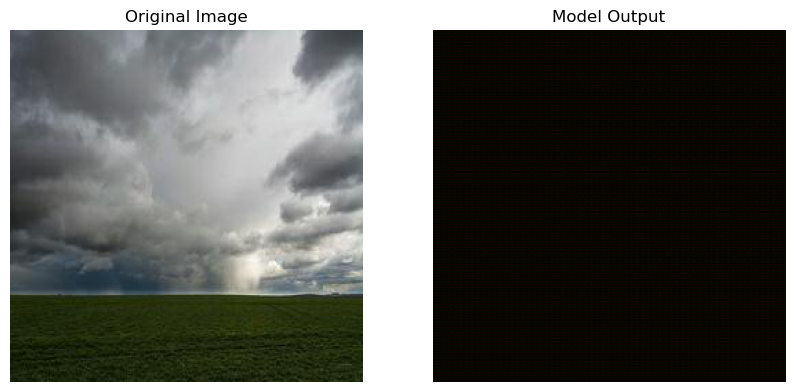

In [72]:
k= save_progress(k+1, print= False )